Examine a portion of Kaggle's Titanic dataset and predict survivability. Exercise uses Pandas, Numpy, Matplotlib, Seaborn, Scikitlearn 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train = pd.read_csv('titanic_train.csv')

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


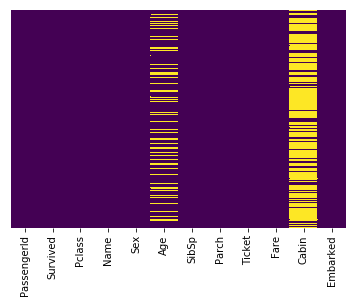

In [3]:
#Create a heatmap to easily visualize where data is missing
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

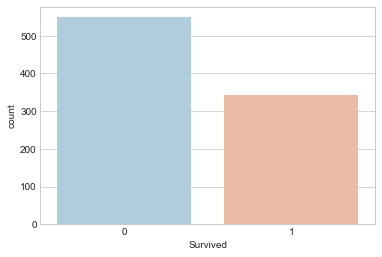

In [5]:
#Take a look at overall survival
sns.set_style('whitegrid')
sns.countplot(x="Survived", data=train, palette="RdBu_r")

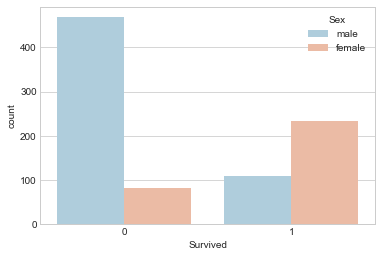

In [7]:
#Visualize the same data, separated by gender
sns.countplot(x='Survived', data=train, hue='Sex', palette='RdBu_r')

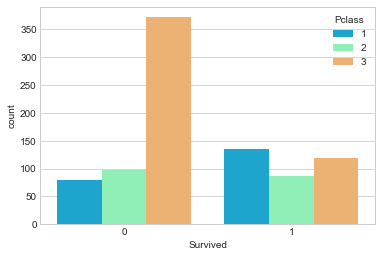

In [8]:
#Visualize the relationship between passenger class and survival
sns.countplot(x='Survived', data=train, hue='Pclass', palette='rainbow')

/Users/anneb/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


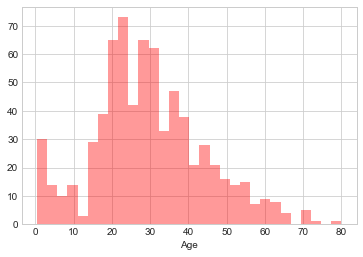

In [9]:
#Age distribution
sns.distplot(train['Age'].dropna(), kde=False, color='r', bins=30)

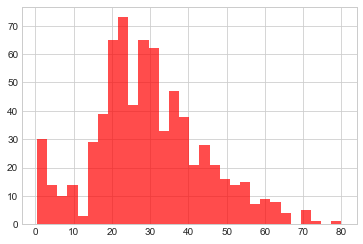

In [10]:
#Pandas histogram of the age data
train['Age'].hist(bins=30, color='r', alpha=.7)

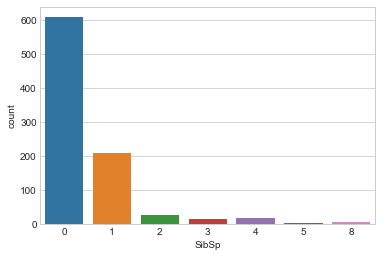

In [11]:
#Passengers aboard with siblings/children/spouses
sns.countplot(x='SibSp', data=train)

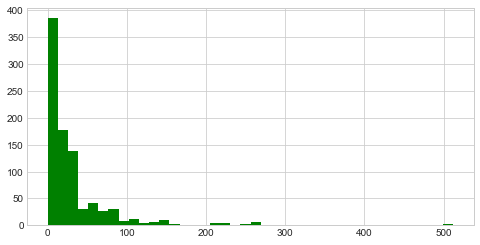

In [16]:
#Fare histogram
train['Fare'].hist(color='green', figsize=(8,4), bins=40)

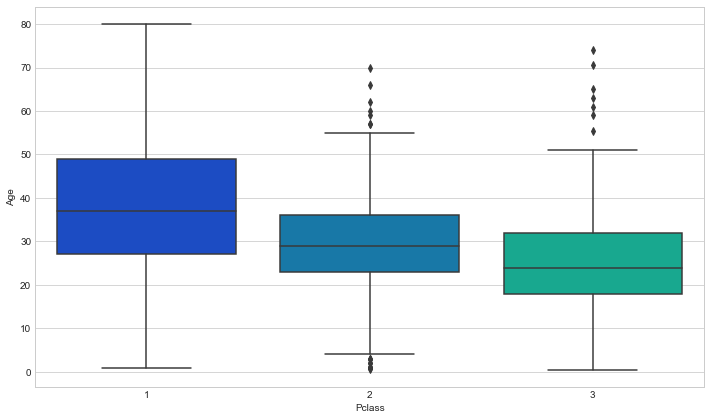

In [20]:
#Check average age by passenger class. This will allow for more informed decision making regarding missing age information.
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass', y='Age', data=train, palette='winter')

In [36]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

In [37]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

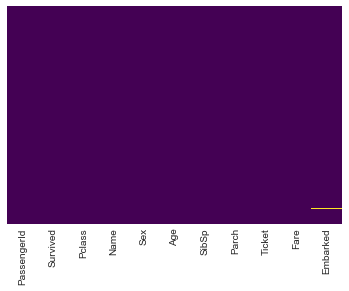

In [45]:
#Check heatmap
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [50]:
#Drop the cabin row and the row that is NaN
train.drop('Cabin',axis=1,inplace=True)

In [51]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [52]:
train.dropna(inplace=True)

In [53]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [61]:
#Convert Sex column to binary values
sex = pd.get_dummies(train['Sex'], drop_first=True)

In [62]:
#Convert Embarked column as well
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [64]:
train = pd.concat([train, sex, embark], axis=1)

In [65]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [66]:
#Remove columns unnecessary to ML algorithm
train.drop(['Sex', 'Embarked', 'Ticket', 'Name'], axis=1, inplace=True)

In [67]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [69]:
train.drop(['PassengerId'], axis=1, inplace=True)

In [73]:
#Setting up the train/test split
from sklearn.model_selection import train_test_split

In [74]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1), 
                                                    train['Survived'], test_size=0.30, 
                                                    random_state=101)

In [75]:
from sklearn.linear_model import LogisticRegression

In [78]:
logmodel = LogisticRegression()

In [80]:
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [81]:
predictions = logmodel.predict(X_test)

In [82]:
from sklearn.metrics import classification_report

In [83]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.80      0.91      0.85       163
          1       0.82      0.65      0.73       104

avg / total       0.81      0.81      0.80       267



In [84]:
from sklearn.metrics import confusion_matrix

In [85]:
confusion_matrix(y_test,predictions)

array([[148,  15],
       [ 36,  68]])